In [1]:
import pandas
df = pandas.read_csv('data/salary.csv', index_col = 0)
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


In [3]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values

Populating the interactive namespace from numpy and matplotlib


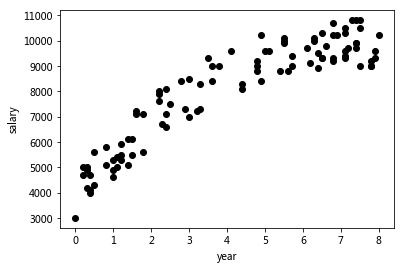

In [10]:
% pylab inline
plt.scatter(X,Y, color="black")
plt.xlabel('year')
plt.ylabel('salary')

In [12]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print('Coefficient:{}'.format(regr.coef_) )
print('Intercept:{}'.format(regr.intercept_) )

Coefficient:[ 712.59413615]
Intercept:5049.009899813836


In [20]:
#regr.predict(X)

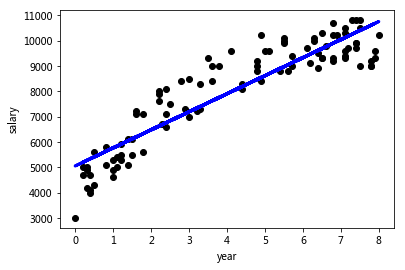

In [24]:
plt.scatter(X,Y, color="black")
plt.plot(X, regr.predict(X), linewidth = 3, color = "blue")
plt.xlabel('year')
plt.ylabel('salary')

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg= PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X)
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
X2 = X.sort_values(['year'])
X2_ = poly_reg.fit_transform(X2)

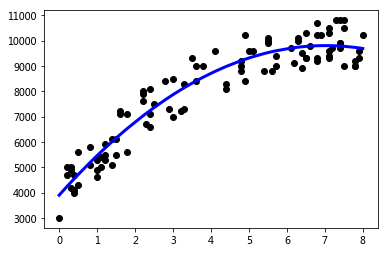

In [34]:
plt.scatter(X,Y, color="black")
plt.plot(X2, regr.predict(X2_), color= "blue", linewidth = 3)

In [72]:
import pandas
df = pandas.read_csv('data/house-prices.csv')

In [73]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [76]:
#pandas.get_dummies(df['Brick'])
#pandas.get_dummies(df['Neighborhood'])

In [83]:
house = pandas.concat([df, pandas.get_dummies(df['Brick']), pandas.get_dummies(df['Neighborhood'])], axis = 1)
del house['No']
del house['West']
del house['Brick']
del house['Neighborhood']
del house['Home']
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,0,1,0
1,114200,2030,4,2,3,0,1,0
2,114800,1740,3,2,1,0,1,0
3,94700,1980,3,2,3,0,1,0
4,119800,2130,3,3,3,0,1,0


In [85]:
X = house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North']]
Y = house['Price'].values

In [86]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
#regr.predict(X)